In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import os
import glob
import seaborn as sns

In [4]:
DATA_DIR = "./data"

input_files = sorted(glob.glob(os.path.join(DATA_DIR, "train/input_2023_w*.csv")))
output_files = sorted(glob.glob(os.path.join(DATA_DIR, "train/output_2023_w*.csv")))

df_in = pd.concat((pd.read_csv(p) for p in tqdm(input_files, desc="loading inputs")), ignore_index=True)
df_out = pd.concat((pd.read_csv(p) for p in tqdm(output_files, desc="loading outputs")), ignore_index=True)

test_in = pd.read_csv(os.path.join(DATA_DIR, "test_input.csv"))
test_template = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
sample_submission = pd.read_csv(os.path.join(DATA_DIR, "sample_submission.csv"))

print("Inputs:", df_in.shape, "Outputs:", df_out.shape, "Test input:", test_in.shape)

loading inputs:   0%|          | 0/18 [00:00<?, ?it/s]

loading outputs:   0%|          | 0/18 [00:00<?, ?it/s]

Inputs: (4880579, 23) Outputs: (562936, 6) Test input: (49753, 23)


In [5]:
output_size = df_in.groupby(['game_id','play_id'])['num_frames_output'].mean()

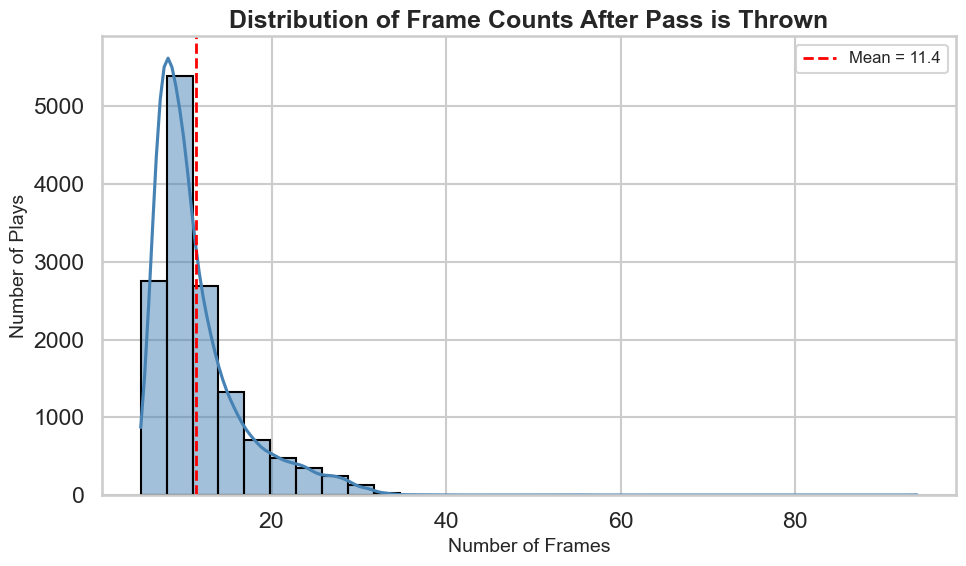

In [6]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.histplot(output_size.values, bins=30, kde=True, color='steelblue', edgecolor='black')

plt.title("Distribution of Frame Counts After Pass is Thrown", fontsize=18, weight='bold')
plt.xlabel("Number of Frames", fontsize=14)
plt.ylabel("Number of Plays", fontsize=14)

plt.axvline(output_size.mean(), color='red', linestyle='--', linewidth=2, label=f"Mean = {output_size.mean():.1f}")
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [7]:
output_size.value_counts().tail(10)

num_frames_output
29.0    62
31.0    35
30.0    29
32.0    12
33.0     9
34.0     4
36.0     2
94.0     1
40.0     1
55.0     1
Name: count, dtype: int64

In [8]:
input_size = df_in.groupby(['game_id','play_id'])['frame_id'].nunique()

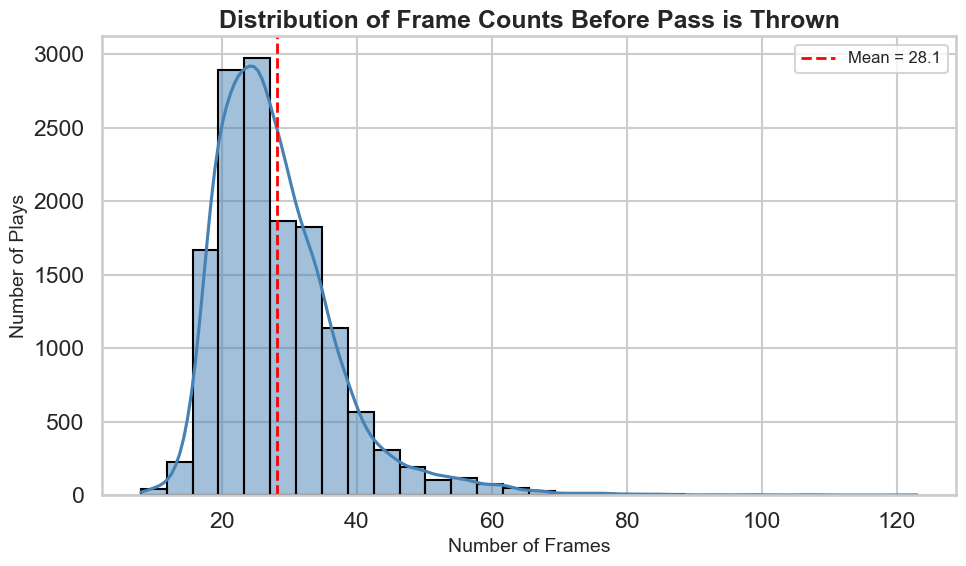

In [9]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.histplot(input_size.values, bins=30, kde=True, color='steelblue', edgecolor='black')

plt.title("Distribution of Frame Counts Before Pass is Thrown", fontsize=18, weight='bold')
plt.xlabel("Number of Frames", fontsize=14)
plt.ylabel("Number of Plays", fontsize=14)

plt.axvline(input_size.mean(), color='red', linestyle='--', linewidth=2, label=f"Mean = {input_size.mean():.1f}")
plt.legend(fontsize=12)
###
plt.tight_layout()
plt.show()

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df_in.loc[df_in['num_frames_output'] > 50,:]

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
283321,2023091100,3167,True,54650,1,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.44,38.31,0.35,0.08,113.32,41.96,94,9.720000,45.459999
283322,2023091100,3167,True,54650,2,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.45,38.32,0.29,0.11,108.90,41.96,94,9.720000,45.459999
283323,2023091100,3167,True,54650,3,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.47,38.36,0.26,0.13,94.48,44.66,94,9.720000,45.459999
283324,2023091100,3167,True,54650,4,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.49,38.41,0.25,0.41,72.10,45.94,94,9.720000,45.459999
283325,2023091100,3167,True,54650,5,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.51,38.44,0.29,1.53,39.62,49.27,94,9.720000,45.459999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039381,2023122100,1450,True,43415,29,left,62,Demarcus Robinson,6-1,203,1994-09-21,WR,Offense,Targeted Receiver,48.81,35.78,6.26,3.49,276.70,269.09,55,45.630001,47.900002
4039382,2023122100,1450,True,43415,30,left,62,Demarcus Robinson,6-1,203,1994-09-21,WR,Offense,Targeted Receiver,48.20,35.87,5.90,4.35,280.53,274.35,55,45.630001,47.900002
4039383,2023122100,1450,True,43415,31,left,62,Demarcus Robinson,6-1,203,1994-09-21,WR,Offense,Targeted Receiver,47.64,36.00,5.64,4.78,286.37,281.69,55,45.630001,47.900002
4039384,2023122100,1450,True,43415,32,left,62,Demarcus Robinson,6-1,203,1994-09-21,WR,Offense,Targeted Receiver,47.13,36.20,5.37,5.68,294.06,292.35,55,45.630001,47.900002


In [19]:
final_frame = df_in.groupby(['game_id','play_id','nfl_id']).tail(1)

In [22]:
player_predict_final = final_frame[final_frame['player_to_predict'] == True]
player_predict_final = player_predict_final[['game_id','play_id','nfl_id','frame_id']]

In [23]:
df_in = df_in.copy()  # avoid SettingWithCopyWarning

is_final_frame = pd.MultiIndex.from_frame(df_in[['game_id','play_id','nfl_id','frame_id']]).isin(
    pd.MultiIndex.from_frame(player_predict_final)
)

df_in['final_frame_prediction'] = np.where(is_final_frame, 1, 0)

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
25,2023090700,101,False,54527,26,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,57.23,35.59,2.97,3.42,133.26,251.72,21,63.259998,-0.22
51,2023090700,101,True,46137,26,right,42,Justin Reid,6-1,204,1997-02-15,SS,Defense,Defensive Coverage,55.82,17.67,5.34,1.80,134.17,184.99,21,63.259998,-0.22
77,2023090700,101,True,52546,26,right,42,L'Jarius Sneed,6-1,193,1997-01-21,CB,Defense,Defensive Coverage,48.01,12.44,2.93,4.75,192.18,309.47,21,63.259998,-0.22
103,2023090700,101,False,53487,26,right,42,Nick Bolton,6-0,232,2000-03-10,MLB,Defense,Defensive Coverage,49.18,22.00,5.03,2.27,133.98,182.20,21,63.259998,-0.22
129,2023090700,101,False,54486,26,right,42,Trent McDuffie,5-11,195,2000-09-13,CB,Defense,Defensive Coverage,49.58,41.96,4.22,3.53,88.36,144.07,21,63.259998,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880470,2024010713,4018,False,46277,27,left,50,Cedrick Wilson Jr.,6-5,188,1995-11-20,WR,Offense,Other Route Runner,42.84,33.28,6.40,1.46,223.91,214.20,18,32.139999,6.71
4880497,2024010713,4018,False,46192,27,left,50,Durham Smythe,6-6,260,1995-08-09,TE,Offense,Other Route Runner,46.80,33.82,7.29,0.18,0.79,38.74,18,32.139999,6.71
4880524,2024010713,4018,False,46377,27,left,50,Jeff Wilson,6-0,194,1995-11-16,RB,Offense,Other Route Runner,57.75,37.21,4.93,2.81,357.51,283.11,18,32.139999,6.71
4880551,2024010713,4018,False,52413,27,left,50,Tua Tagovailoa,6-1,218,1998-03-02,QB,Offense,Passer,57.88,28.69,0.99,0.74,209.45,228.08,18,32.139999,6.71


In [26]:
df_in.loc[(df_in['game_id'] ==2023090700) & (df_in['play_id'] == 101) & (df_in['frame_id'] == 26)]


,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y,final_frame_prediction
25,2023090700,101,False,54527,26,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,57.23,35.59,2.97,3.42,133.26,251.72,21,63.259998,-0.22,0
51,2023090700,101,True,46137,26,right,42,Justin Reid,6-1,204,1997-02-15,SS,Defense,Defensive Coverage,55.82,17.67,5.34,1.80,134.17,184.99,21,63.259998,-0.22,1
77,2023090700,101,True,52546,26,right,42,L'Jarius Sneed,6-1,193,1997-01-21,CB,Defense,Defensive Coverage,48.01,12.44,2.93,4.75,192.18,309.47,21,63.259998,-0.22,1
103,2023090700,101,False,53487,26,right,42,Nick Bolton,6-0,232,2000-03-10,MLB,Defense,Defensive Coverage,49.18,22.00,5.03,2.27,133.98,182.20,21,63.259998,-0.22,0
129,2023090700,101,False,54486,26,right,42,Trent McDuffie,5-11,195,2000-09-13,CB,Defense,Defensive Coverage,49.58,41.96,4.22,3.53,88.36,144.07,21,63.259998,-0.22,0
155,2023090700,101,False,53541,26,right,42,Amon-Ra St. Brown,6-1,195,1999-10-24,WR,Offense,Other Route Runner,46.85,13.31,6.55,3.40,174.03,236.81,21,63.259998,-0.22,0
181,2023090700,101,False,53959,26,right,42,Brock Wright,6-4,255,1998-11-27,TE,Offense,Other Route Runner,50.60,36.43,4.57,4.11,107.03,133.53,21,63.259998,-0.22,0
207,2023090700,101,False,43290,26,right,42,Jared Goff,6-4,223,1994-10-14,QB,Offense,Passer,35.41,29.99,0.64,0.47,108.83,212.25,21,63.259998,-0.22,0
233,2023090700,101,True,44930,26,right,42,Josh Reynolds,6-3,196,1995-02-16,WR,Offense,Targeted Receiver,52.43,14.14,7.90,2.68,99.25,106.80,21,63.259998,-0.22,1
